In [55]:
import pandas as pd
past_df = pd.read_csv("/Users/saimouryab/Downloads/Crime_Data_from_2010_to_2019.csv")
#combined_df = pd.concat([df, past_df])
past_df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
2135652,190506304,02/22/2019 12:00:00 AM,02/22/2019 12:00:00 AM,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801
2135653,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2135654,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2135655,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085
2135656,190805435,02/01/2019 12:00:00 AM,02/01/2019 12:00:00 AM,1615,8,West LA,852,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,1700 BARRY AV,NaN,34.0420,-118.4531


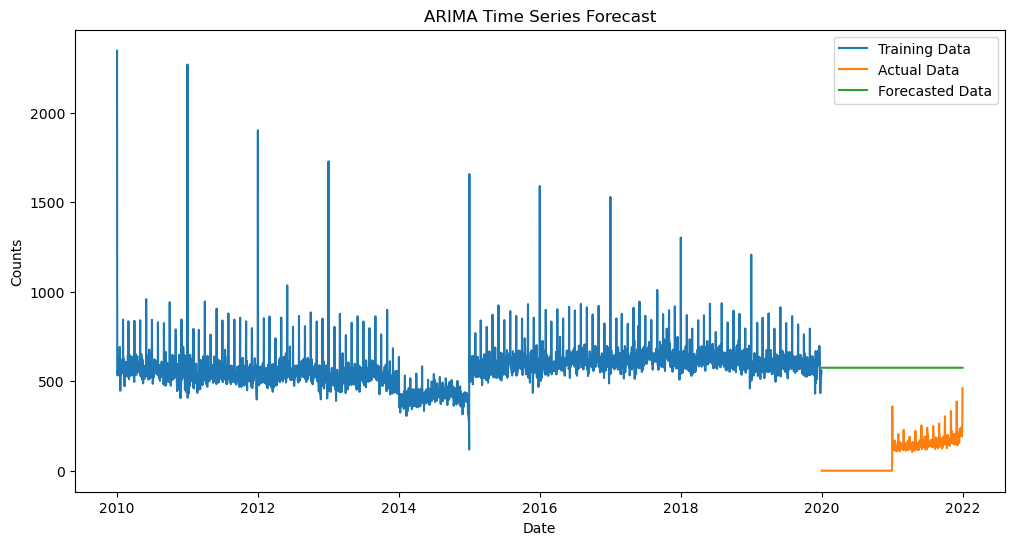

In [56]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming past_df is your DataFrame and 'DATE OCC' has already been converted to datetime
# If not, convert it:
past_df['DATE OCC'] = pd.to_datetime(past_df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Resample to get daily counts
daily_counts = past_df.resample('D', on='DATE OCC').size()

# Split the data into training and testing sets
train = daily_counts[daily_counts.index < '2020-01-01']
test = daily_counts[daily_counts.index >= '2020-01-01']

# Fit an ARIMA model
# The parameters (p,d,q) need to be chosen based on the data characteristics
model = ARIMA(train, order=(1,1,1))  # Example parameters
fitted_model = model.fit()

# Predict
forecast = fitted_model.get_forecast(steps=len(test))
forecast_index = pd.date_range(start=test.index[0], periods=len(test), freq='D')
forecast_df = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data')
plt.plot(forecast_df, label='Forecasted Data')
plt.title('ARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [58]:
filtered_df = past_df[past_df['DATE OCC'] <= '01/01/2020']

In [57]:
past_df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
2135652,190506304,02/22/2019 12:00:00 AM,2019-02-22,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801
2135653,190608903,03/28/2019 12:00:00 AM,2019-03-28,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2135654,192004409,01/06/2019 12:00:00 AM,2019-01-06,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2135655,191716777,10/17/2019 12:00:00 AM,2019-10-16,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085
2135656,190805435,02/01/2019 12:00:00 AM,2019-02-01,1615,8,West LA,852,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,1700 BARRY AV,NaN,34.0420,-118.4531


In [59]:
filtered_df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
2135652,190506304,02/22/2019 12:00:00 AM,2019-02-22,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801
2135653,190608903,03/28/2019 12:00:00 AM,2019-03-28,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2135654,192004409,01/06/2019 12:00:00 AM,2019-01-06,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2135655,191716777,10/17/2019 12:00:00 AM,2019-10-16,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085
2135656,190805435,02/01/2019 12:00:00 AM,2019-02-01,1615,8,West LA,852,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,1700 BARRY AV,NaN,34.0420,-118.4531


/var/folders/lc/7q7180414lzbsm27dnbt0sxr0000gn/T/ipykernel_77155/43625247.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DATE OCC'] = pd.to_datetime(filtered_df['DATE OCC'])


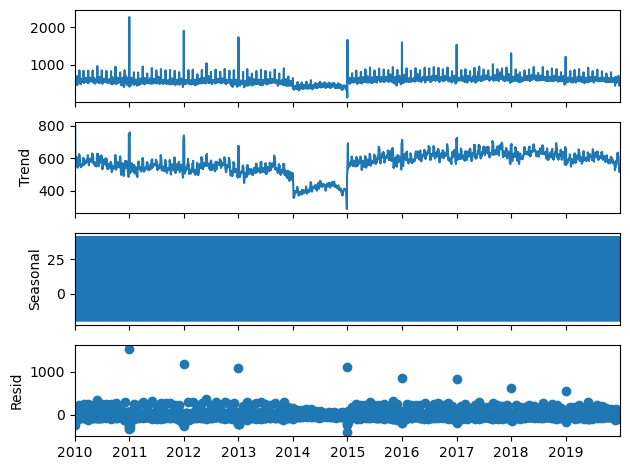

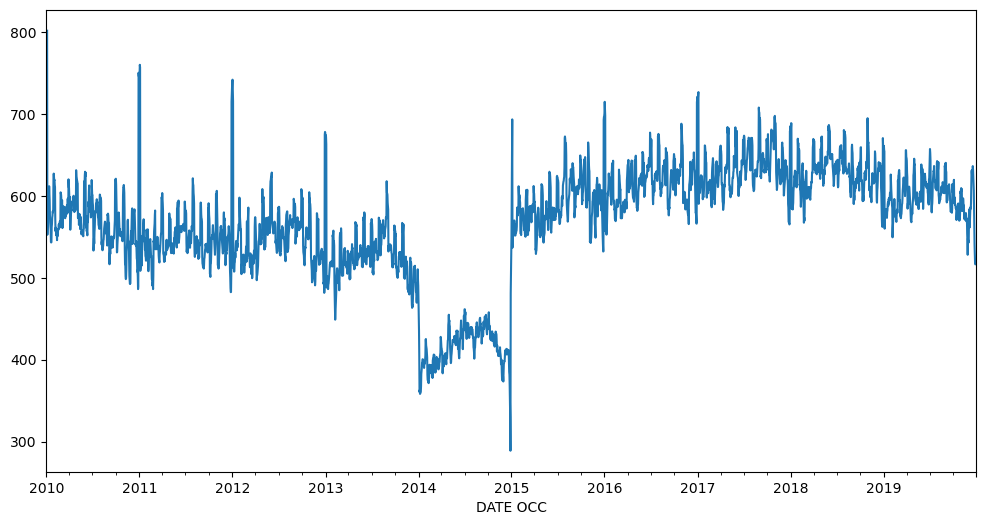

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

filtered_df['DATE OCC'] = pd.to_datetime(filtered_df['DATE OCC'])

# Set the 'DATE OCC' as the index
filtered_df.set_index('DATE OCC', inplace=True)
# Resample the data to get a count of crimes per day
daily_crime_counts = filtered_df.resample('D').size()

# Perform a seasonal decomposition
decomposition = seasonal_decompose(daily_crime_counts, model='additive')

# Plot the decomposed time series components
decomposition.plot()
plt.show()

# To further analysis, you may want to investigate the trend component or the seasonal component
# For example, here's how to plot just the trend
trend = decomposition.trend
trend.plot(figsize=(12, 6))
plt.show()

# You can also perform additional statistical tests, such as checking for stationarity,
# or model the time series using ARIMA, SARIMA, or other suitable models.


In [71]:
df= pd.read_csv("/Users/saimouryab/Downloads/Crime_Data_from_2020_to_Present.csv")
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Set the 'DATE OCC' as the index
df.set_index('DATE OCC', inplace=True)
combined_df = pd.concat([filtered_df, df])

/var/folders/lc/7q7180414lzbsm27dnbt0sxr0000gn/T/ipykernel_77155/381394191.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


In [73]:
combined_df.head()

,DR_NO,Date Rptd,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
DATE OCC,,,,,,,,,,,,,,,,,,,,,
2010-02-20,1307355,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
2010-09-12,11401303,09/13/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
2010-08-09,70309629,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
2010-01-05,90631215,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
2010-01-02,100100501,01/03/2010 12:00:00 AM,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",0400,...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN


In [64]:
combined_df.tail()

,DR_NO,Date Rptd,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
DATE OCC,,,,,,,,,,,,,,,,,,,,,
2023-01-26,231604807,01/27/2023 12:00:00 AM,1800,NaN,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,...,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054,16.0
2023-03-22,231606525,03/22/2023 12:00:00 AM,1000,NaN,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,...,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116,16.0
2023-04-12,231210064,04/12/2023 12:00:00 AM,1630,NaN,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,...,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915,12.0
2023-07-01,230115220,07/02/2023 12:00:00 AM,1,NaN,Central,154,1,352,PICKPOCKET,1822 0344,...,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485,1.0
2023-03-05,230906458,03/05/2023 12:00:00 AM,900,NaN,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,...,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487,9.0


In [66]:
len(filtered_df)

2077549

In [67]:
len(df)

825212

In [68]:
len(combined_df)

2902761

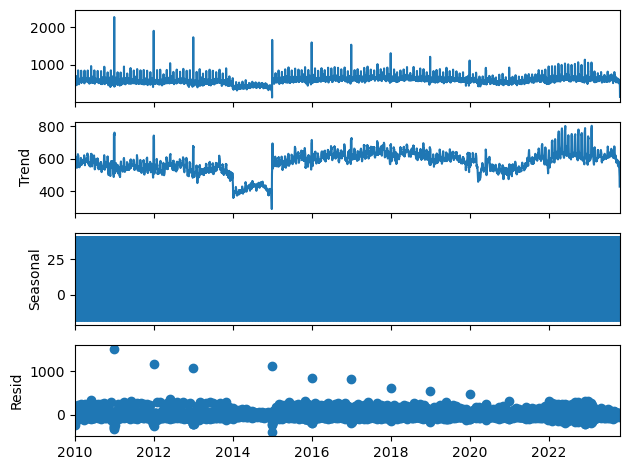

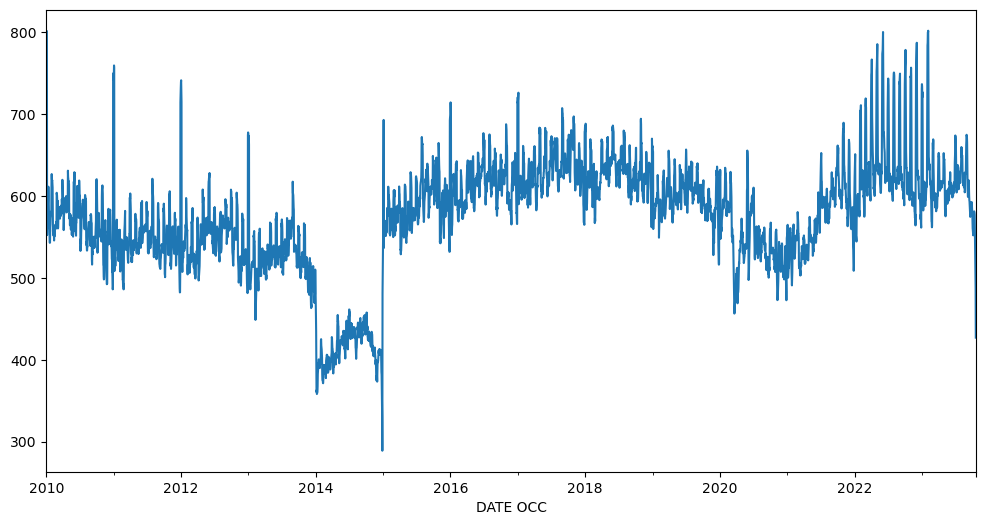

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the data to get a count of crimes per day
daily_crime_counts = combined_df.resample('D').size()

# Perform a seasonal decomposition
decomposition = seasonal_decompose(daily_crime_counts, model='additive')

# Plot the decomposed time series components
decomposition.plot()
plt.show()

# To further analysis, you may want to investigate the trend component or the seasonal component
# For example, here's how to plot just the trend
trend = decomposition.trend
trend.plot(figsize=(12, 6))
plt.show()

# You can also perform additional statistical tests, such as checking for stationarity,
# or model the time series using ARIMA, SARIMA, or other suitable models.
